In [1]:
from create_data import DumbCirc as dc
from create_data_single import Dumb as db
from augsuq import AugmentedSUQ as auq
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 22)
fpc, fnc, pc, lp, tc, lt = data_instance.create_dataset(50, 1, [50], [0.2], True)

In [3]:
import torch
torch.manual_seed(22)
fpc, fnc, pc, lp, tc, lt = torch.tensor(fpc), torch.tensor(fnc), torch.tensor(pc), torch.tensor(lp), torch.tensor(tc), torch.tensor(lt)

In [4]:
model_zero = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp, mapping_dim=6, count_labels=2, negative_cloud=fnc)

In [ ]:
use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
device = "cpu"
model_zero.set_device(device)

In [ ]:
model_zero.train(num_epochs=10, batch_size=20, learning_rate=0.0001)

In [ ]:
model_zero.set_test_data(tc, lt)

In [ ]:
model_zero.predict()

In [ ]:
model_zero.set_test_data(pc[2:4, :], lp[2:4, :])

In [ ]:
model_zero.predict()

In [5]:
model_bin = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp,  mapping_dim=6, negative_cloud=fnc)

In [6]:
device = "cpu"
model_bin.set_device(device)

In [7]:
model_bin.train(num_epochs=10, batch_size=20, learning_rate=0.0001, kind='b')

C:\Users\Acer\Documents\All_of_RWTH\ThesisTarget\1MYWORK\thesis_notebooks\augsuq.py:231: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3679.)
  + posterior_mean_pos.T @ torch.linalg.inv(posterior_var_pos) @ posterior_mean_pos


Epoch:0, Loss: 3.492893409729004
Epoch:1, Loss: 3.362669792175293
Epoch:2, Loss: 4.061802165985108
Epoch:3, Loss: 4.3081886802673335
Epoch:4, Loss: 3.9872096068573
Epoch:5, Loss: 4.365903148788452
Epoch:6, Loss: 6.873663808850097
Epoch:7, Loss: 4.708841877370605
Epoch:8, Loss: 4.23878747566333
Epoch:9, Loss: 3.927250970092993


In [8]:
model_bin.set_test_data(tc, lt)

tensor([[1.0000e+00, 9.9606e-01, 9.8453e-01,  ..., 1.0297e-01, 1.7483e-12,
         2.9566e-09],
        [9.9606e-01, 1.0000e+00, 9.9616e-01,  ..., 1.2153e-01, 3.3244e-12,
         3.2974e-09],
        [9.8453e-01, 9.9616e-01, 1.0000e+00,  ..., 1.4164e-01, 6.2024e-12,
         3.5793e-09],
        ...,
        [1.0297e-01, 1.2153e-01, 1.4164e-01,  ..., 1.0000e+00, 5.4226e-07,
         1.1573e-06],
        [1.7483e-12, 3.3244e-12, 6.2024e-12,  ..., 5.4226e-07, 1.0000e+00,
         3.7773e-14],
        [2.9566e-09, 3.2974e-09, 3.5793e-09,  ..., 1.1573e-06, 3.7773e-14,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([ 8.8033e-05,  7.6220e-04,  1.5450e-03,  ..., -5.0949e-03,
        -5.5939e-03, -5.8702e-03], grad_fn=<MvBackward0>)


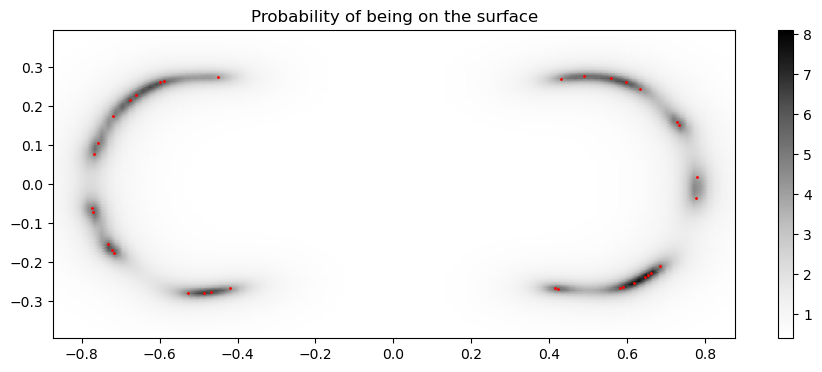

In [9]:
model_bin.predict()

In [10]:
model_bin.get_posterior_test(tc[0])

tensor([[1.0000e+00, 1.7137e-10, 6.5949e-10,  ..., 2.9613e-01, 1.8449e-07,
         4.0481e-04],
        [1.7137e-10, 1.0000e+00, 4.0171e-02,  ..., 1.1399e-10, 2.8506e-06,
         1.1241e-05],
        [6.5949e-10, 4.0171e-02, 1.0000e+00,  ..., 1.8051e-08, 1.9283e-02,
         7.3057e-09],
        ...,
        [2.9613e-01, 1.1399e-10, 1.8051e-08,  ..., 1.0000e+00, 5.1118e-05,
         2.2622e-06],
        [1.8449e-07, 2.8506e-06, 1.9283e-02,  ..., 5.1118e-05, 1.0000e+00,
         3.4335e-11],
        [4.0481e-04, 1.1241e-05, 7.3057e-09,  ..., 2.2622e-06, 3.4335e-11,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([ 0.0015, -0.0020, -0.0016,  0.0083, -0.0041, -0.0019, -0.0123, -0.0055,
         0.0012, -0.0060, -0.0100, -0.0033, -0.0004, -0.0004, -0.0005,  0.0022,
        -0.0047, -0.0020, -0.0089, -0.0030,  0.0048,  0.0018,  0.0002,  0.0054,
         0.0054, -0.0046, -0.0009, -0.0104,  0.0059,  0.0069, -0.0094, -0.0031,
         0.0016,  0.0029,  0.0062], grad_fn=<MvBackward0>)
t

In [11]:
model_bin.get_posterior_test(fpc[1])

tensor([[1.0000e+00, 1.4200e-04, 3.1352e-01,  ..., 7.6136e-06, 6.1613e-04,
         8.9908e-05],
        [1.4200e-04, 1.0000e+00, 1.2472e-07,  ..., 7.9656e-01, 5.1712e-05,
         1.2397e-06],
        [3.1352e-01, 1.2472e-07, 1.0000e+00,  ..., 3.1040e-09, 2.7097e-06,
         7.8472e-05],
        ...,
        [7.6136e-06, 7.9656e-01, 3.1040e-09,  ..., 1.0000e+00, 3.4926e-06,
         3.2046e-07],
        [6.1613e-04, 5.1712e-05, 2.7097e-06,  ..., 3.4926e-06, 1.0000e+00,
         1.1181e-13],
        [8.9908e-05, 1.2397e-06, 7.8472e-05,  ..., 3.2046e-07, 1.1181e-13,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([-4.8402e-03, -1.7357e-03, -1.8617e-02, -5.7601e-03, -1.0355e-04,
         1.3171e-02,  7.3726e-03, -7.5021e-03, -3.5173e-03, -4.9465e-04,
        -9.8092e-03,  4.6516e-03,  9.5762e-03, -8.6855e-04, -2.7309e-02,
        -1.4574e-03,  1.3023e-03, -1.7993e-02,  1.1754e-03,  9.7898e-04,
         4.2869e-03, -9.1580e-03, -5.9912e-03, -9.3183e-03, -1.0353e-02,
        -1.9071

In [12]:
model_bin.set_test_data(pc[2:4, :], lp[2:4, :])

tensor([[1.0000e+00, 9.9538e-01, 9.8183e-01,  ..., 1.1070e-07, 2.6651e-01,
         5.4060e-02],
        [9.9538e-01, 1.0000e+00, 9.9547e-01,  ..., 1.7191e-07, 2.9925e-01,
         5.8520e-02],
        [9.8183e-01, 9.9547e-01, 1.0000e+00,  ..., 2.6279e-07, 3.3235e-01,
         6.2636e-02],
        ...,
        [1.1070e-07, 1.7191e-07, 2.6279e-07,  ..., 1.0000e+00, 2.8542e-04,
         5.3037e-04],
        [2.6651e-01, 2.9925e-01, 3.3235e-01,  ..., 2.8542e-04, 1.0000e+00,
         4.4480e-01],
        [5.4060e-02, 5.8521e-02, 6.2636e-02,  ..., 5.3037e-04, 4.4480e-01,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([0.0002, 0.0003, 0.0004,  ..., 0.0086, 0.0071, 0.0056],
       grad_fn=<MvBackward0>)
tensor([[1.0000e+00, 9.9651e-01, 9.8604e-01,  ..., 5.0539e-01, 5.3300e-06,
         2.9330e-04],
        [9.9651e-01, 1.0000e+00, 9.9647e-01,  ..., 5.3608e-01, 4.8956e-06,
         2.5897e-04],
        [9.8604e-01, 9.9647e-01, 1.0000e+00,  ..., 5.6389e-01, 4.4229e-06,
         2.2531e-0

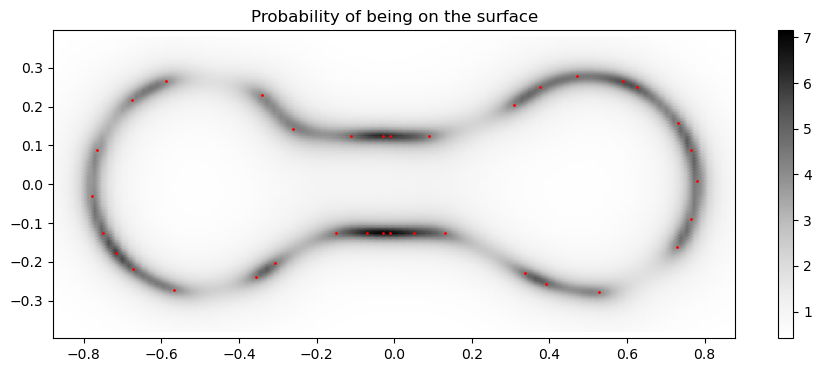

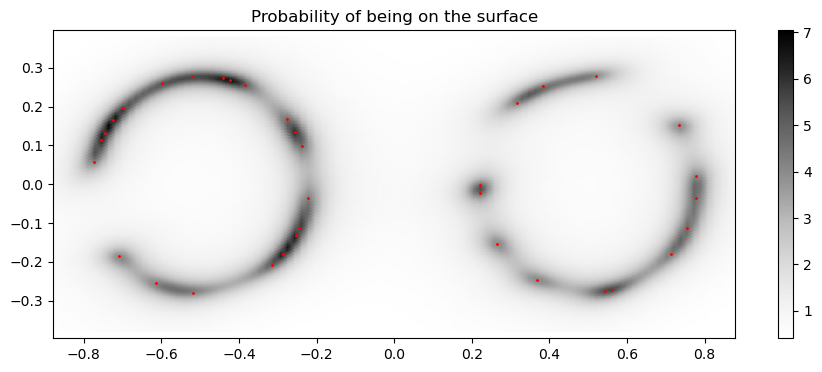

In [13]:
model_bin.predict()

In [ ]:
data_instance = db(0.5, 0.5, 0.25, 22)
fpc, fnc, pc, lp, tc, lt = data_instance.create_dataset(50, 1, [50], [0.2], True)